In [9]:
import pandas as pd
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv("iris.data")
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
from sklearn.preprocessing import StandardScaler
variables = ["sepal length","sepal width","petal length","petal width"]
x = df.loc[:, variables].values
y = df.loc[:,["target"]].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
print(x)

            0         1         2         3
0   -0.900681  1.032057 -1.341272 -1.312977
1   -1.143017 -0.124958 -1.341272 -1.312977
2   -1.385353  0.337848 -1.398138 -1.312977
3   -1.506521  0.106445 -1.284407 -1.312977
4   -1.021849  1.263460 -1.341272 -1.312977
..        ...       ...       ...       ...
145  1.038005 -0.124958  0.819624  1.447956
146  0.553333 -1.281972  0.705893  0.922064
147  0.795669 -0.124958  0.819624  1.053537
148  0.432165  0.800654  0.933356  1.447956
149  0.068662 -0.124958  0.762759  0.790591

[150 rows x 4 columns]


In [19]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


In [20]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [23]:
x_pca["target"]=y
x_pca.columns = ["PC1","PC2","PC3","PC4","target"]
x_pca.head()

,PC1,PC2,PC3,PC4,target
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


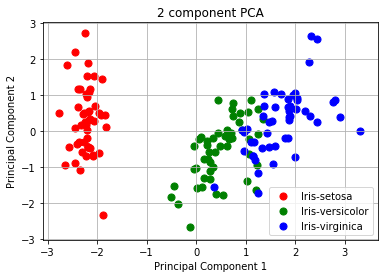

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("Principal Component 1") 
ax.set_ylabel("Principal Component 2") 
ax.set_title("2 component PCA") 
targets = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
colors = ["r", "g", "b"]
for target, color in zip(targets,colors):
 indicesToKeep = x_pca["target"] == target
 ax.scatter(x_pca.loc[indicesToKeep, "PC1"]
 , x_pca.loc[indicesToKeep, "PC2"]
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()